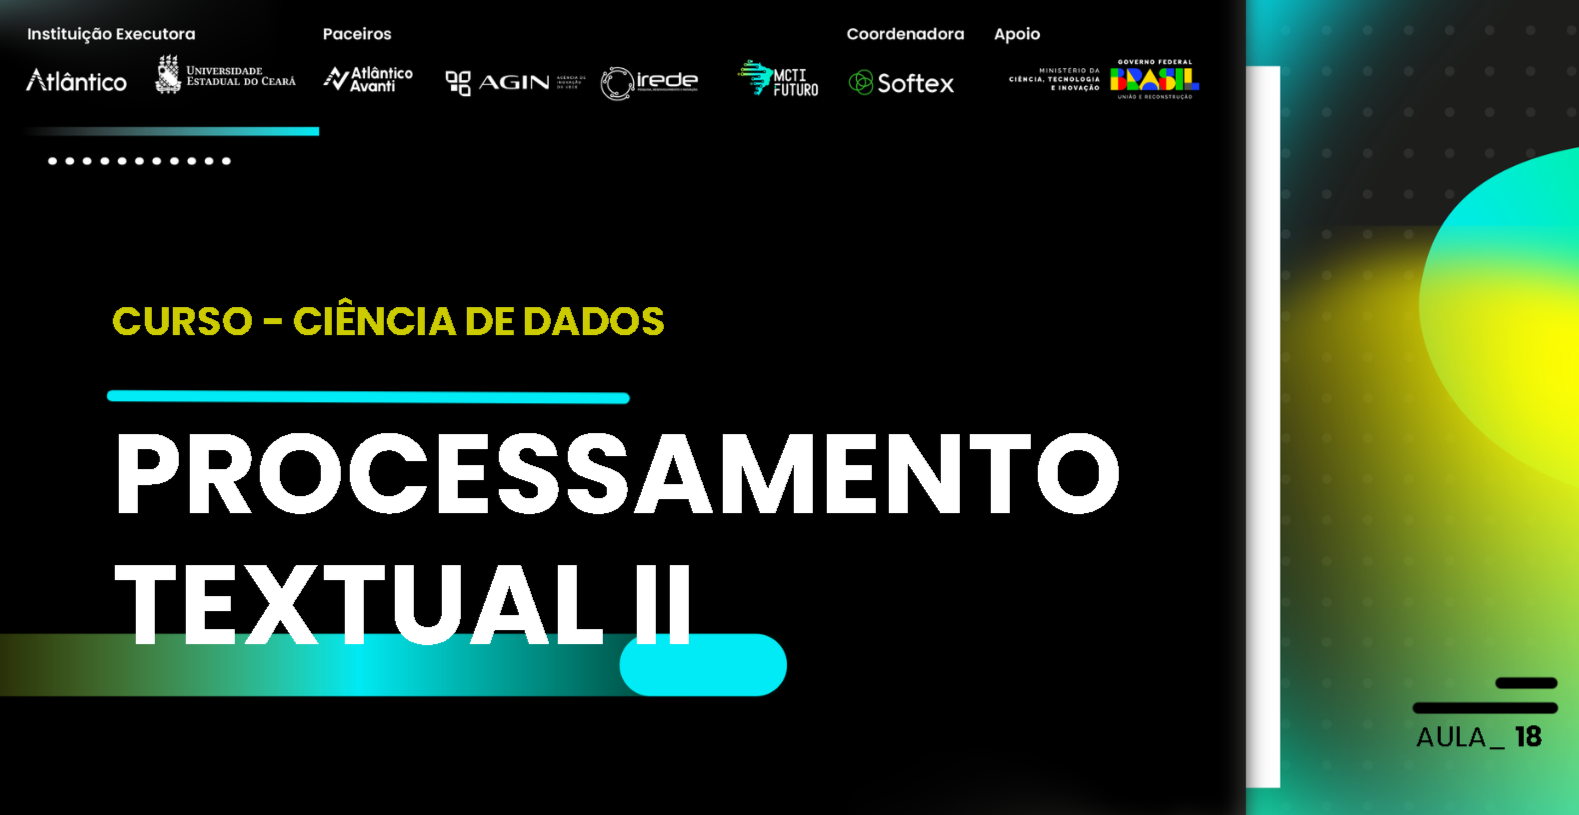


# Processamento Textual: Teoria e Prática com Word2Vec, Clusterização e LSTMs




## Embeddings Word2Vec

Os embeddings são representações vetoriais das palavras em um espaço contínuo, permitindo que palavras semanticamente semelhantes fiquem próximas nesse espaço.
O Word2Vec é um dos modelos mais populares para criar embeddings e utiliza dois métodos principais:

- **Skip-Gram**: Prediz o contexto de uma palavra a partir da palavra alvo.
- **CBOW (Continuous Bag of Words)**: Prediz a palavra alvo a partir de seu contexto.

Nesta seção, vamos criar embeddings utilizando um corpus sintético simples. O objetivo é demonstrar como treinar um modelo Word2Vec e analisar as representações geradas.


In [ ]:
!pip install nltk
!pip install gensim

In [ ]:

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import numpy as np

nltk.download("punkt_tab")

# Corpus sintético simples
corpus = [
    "rei homem mulher rainha",
    "rei rainha trono castelo",
    "homem mulher menino menina",
    "rei castelo cavaleiro rainha",
]

# Tokenização
tokenized_corpus = [word_tokenize(sentence) for sentence in corpus]

# [['rei', 'homem', 'mulher', 'rainha'],
#  ['rei', 'rainha', 'trono', 'castelo'],
#  ...]


# Treinamento do modelo Word2Vec
model = Word2Vec(sentences=tokenized_corpus, vector_size=50, window=3, min_count=1, workers=4)
# sentences=tokenized_corpus: corpus tokenizado como entrada.
# vector_size=50: cada palavra será representada como um vetor de 50 dimensões.
# window=3: o modelo considera até 3 palavras antes e depois de cada palavra para entender o contexto.
# min_count=1: inclui todas as palavras (mesmo que apareçam uma vez só).
# workers=4: usa 4 núcleos da CPU para acelerar o treinamento.
print("Modelo Word2Vec treinado!")

# Análise de embeddings
print("Vetor para 'rei':", model.wv["rei"][:5])
print("Palavras semelhantes a 'rei':", model.wv.most_similar("rei", topn=3))


Modelo Word2Vec treinado!
Vetor para 'rei': [-0.01631583  0.0089916  -0.00827415  0.00164907  0.01699724]
Palavras semelhantes a 'rei': [('homem', 0.12486250698566437), ('menina', 0.07399576157331467), ('rainha', 0.04237300902605057)]


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Por que "homem" tem maior similaridade com "rei"?
1. Posição relativa das palavras (window=3)

- Na Frase 1: rei está imediatamente ao lado de homem
- Na Frase 1: rei está 3 posições distante de rainha
- Word2Vec dá mais peso para palavras mais próximas!

2. Padrões de co-ocorrência

- rei e homem aparecem juntos na mesma sequência contextual
- homem também co-ocorre com outras palavras que rei "conhece" (como mulher)


## Clusterização de Palavras

A clusterização é uma técnica de aprendizado não supervisionado para agrupar dados similares.
Usaremos o algoritmo **K-Means** para agrupar palavras baseadas em seus embeddings.

Além disso, visualizaremos:
- Um gráfico de dispersão dos clusters.
- Uma matriz de similaridade entre palavras usando um heatmap.


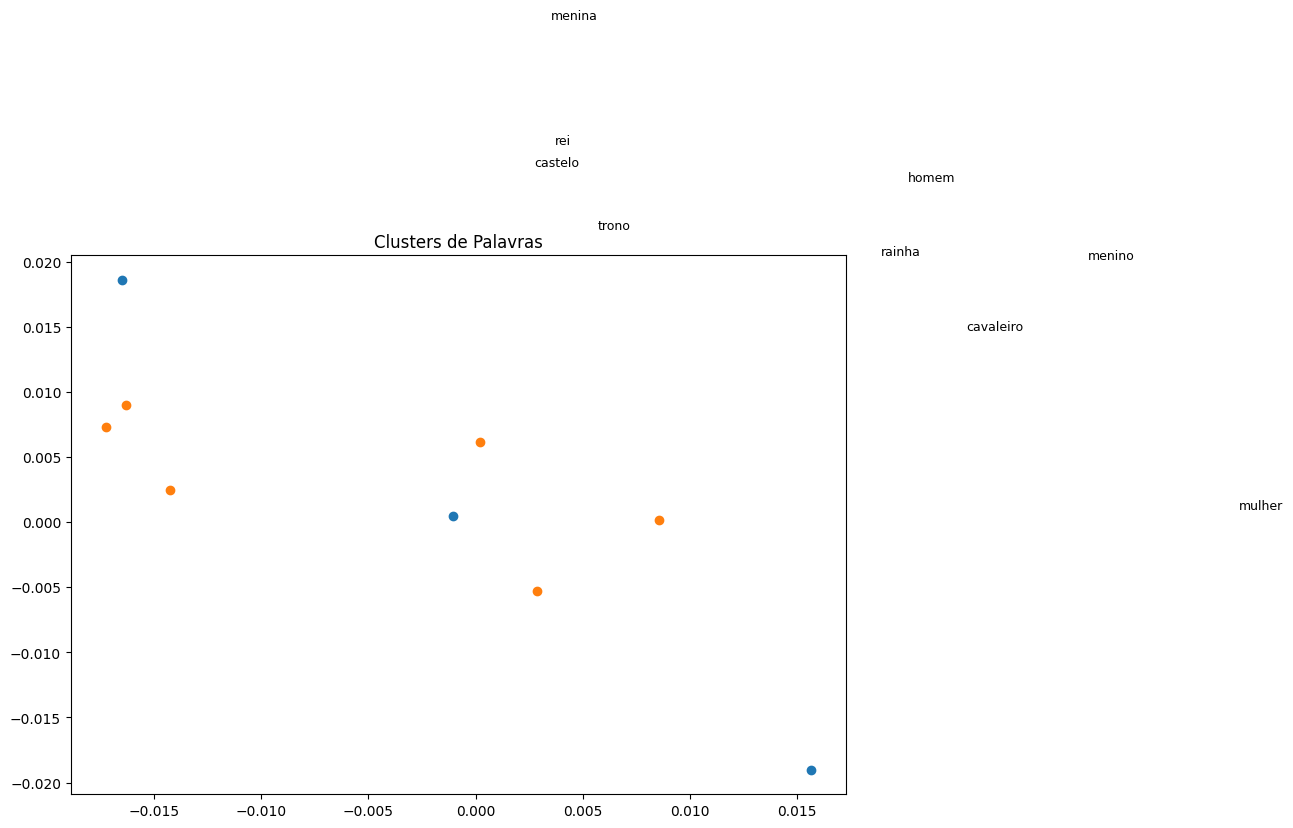

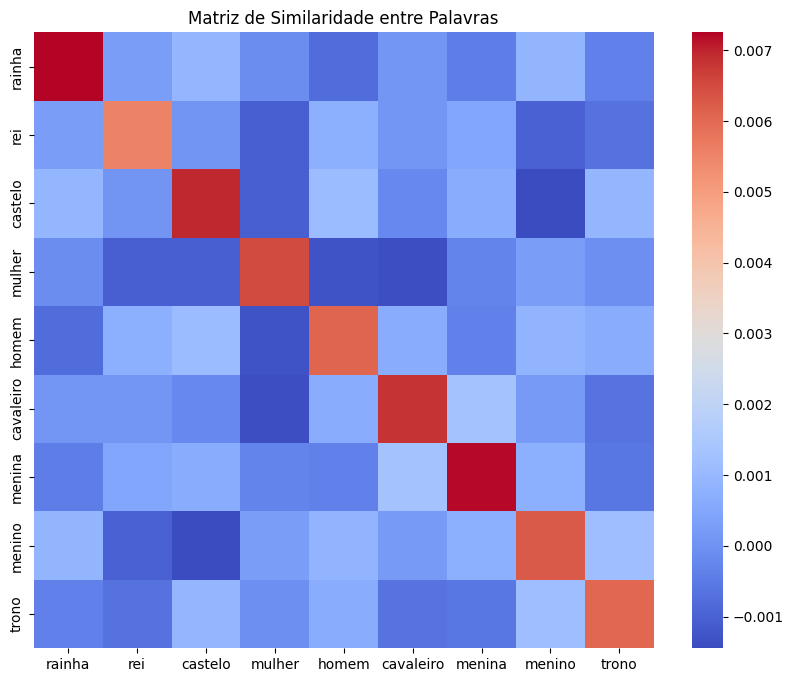

In [ ]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Clusterização com K-Means
words = list(model.wv.index_to_key)
vectors = np.array([model.wv[word] for word in words])

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(vectors)

# Visualização dos clusters
plt.figure(figsize=(10, 7))
for i, word in enumerate(words):
    plt.scatter(vectors[i, 0], vectors[i, 1], c=f"C{labels[i]}")
    plt.text(vectors[i, 0] + 0.02, vectors[i, 1] + 0.02, word, fontsize=9)
plt.title("Clusters de Palavras")
plt.show()

# Matriz de similaridade
similarity_matrix = np.dot(vectors, vectors.T)
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=words, yticklabels=words, cmap="coolwarm")
plt.title("Matriz de Similaridade entre Palavras")
plt.show()


#### O que o gráfico representa?


#### Análise detalhada
###### Cluster Azul:
- Contém palavras como "rei", "castelo", e "trono".
- Essas palavras são semanticamente relacionadas, pois todas estão associadas ao contexto de realeza e ambientes monárquicos.
- Isso mostra que o modelo Word2Vec capturou corretamente as relações semânticas do corpus.
###### Cluster Laranja:
- Inclui palavras como "homem", "mulher" e "menino"
- Essas palavras estão relacionadas a gêneros e faixas etárias, formando um agrupamento distinto dos termos relacionados à realeza.

###### Posições específicas:
- "Rei" e "trono": Estão muito próximos, indicando que o modelo aprendeu uma relação semântica forte entre eles (o que faz sentido, pois "rei" geralmente está associado a um trono no corpus).
- "Mulher": Está mais distante de "rei" e "trono", pois pertence ao cluster laranja, que trata de conceitos diferentes (gênero e idade).
- "Menino" e "menina": Estão próximos entre si, refletindo a similaridade semântica entre os termos.

##### Gráfico 2: Matriz de Similaridade entre Palavras
Este gráfico é um heatmap que mostra a similaridade entre palavras no espaço vetorial. Cada célula representa o produto escalar entre os vetores de duas palavras.

- Cores mais claras/vermelhas: Indicam maior similaridade entre palavras (produto escalar maior).
- Cores mais escuras/azuladas: Indicam menor similaridade entre palavras (produto escalar menor ou negativo).

Por exemplo:
- A similaridade entre "rei" e "rainha" é alta (vermelho), indicando que essas palavras compartilham muitos atributos semânticos no corpus.
- Palavras como "rei" e "cavaleiro" também apresentam uma certa similaridade, mas menos intensa do que a entre "rei" e "rainha".
- Palavras como "trono" e "menino" possuem baixa similaridade, refletindo seu significado distante no corpus.



### Redes Neurais Recorrentes (RNNs)
As RNNs são amplamente utilizadas em tarefas de Processamento de Linguagem Natural (NLP), como análise de sentimentos, devido à sua capacidade de processar dados sequenciais.

#### Natureza Sequencial do Texto
O texto é uma sequência de palavras, onde o significado de uma palavra muitas vezes depende do contexto em que está inserida.
RNNs são projetadas para capturar relações e padrões em dados sequenciais, analisando uma palavra ou caractere considerando as informações anteriores.

#### Memória de Longo Alcance
RNNs têm uma memória interna que armazena informações sobre o que já foi processado.
Isso permite que a rede compreenda dependências de longo prazo no texto, o que é essencial para capturar nuances de sentimento em frases mais longas.




#### Capacidade de Modelar Contexto
As palavras em um texto podem ter diferentes significados dependendo do contexto.
RNNs conseguem capturar essas diferenças, entendendo o sentimento implícito nas relações entre as palavras.

#### Eficiência em Capturar Padrões Temporais
- RNNs processam sequências de forma recorrente, atualizando sua memória a cada etapa.
- Isso permite que a rede detecte padrões temporais no texto, como negações ou contrastes.


## Redes LSTM (Memória de Longo Prazo)

As redes LSTM são uma variante das redes neurais recorrentes, projetadas para capturar dependências de longo prazo em dados sequenciais.
Nesta seção, treinaremos uma LSTM para prever a próxima palavra em sequências textuais.

### Etapas:
1. Criar um corpus sintético simples.
2. Gerar sequências para treinamento.
3. Treinar a LSTM e visualizar a evolução da perda.
4. Usar o modelo para gerar texto.


In [ ]:
!pip install tensorflow

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.0667 - loss: 2.3015  
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1750 - loss: 2.2973
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2167 - loss: 2.2928
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1750 - loss: 2.2910
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2167 - loss: 2.2851
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2167 - loss: 2.2821
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2167 - loss: 2.2784
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2167 - loss: 2.2726 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2167 - loss: 2.2707
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2167 - loss: 2.2679
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2167 - loss: 2.2634 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1750 

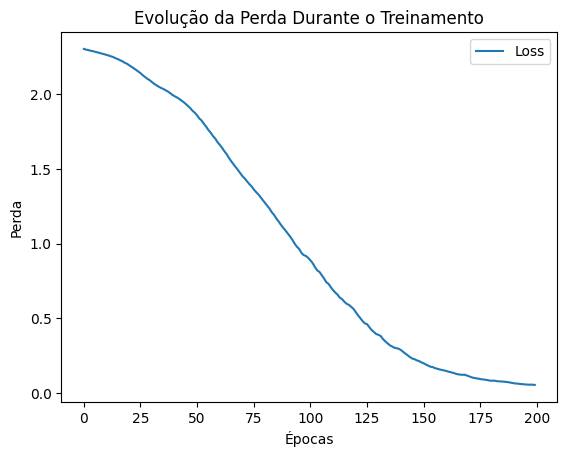

Texto gerado: rei homem mulher rainha rainha


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Corpus sintético
corpus = [
    "rei homem mulher rainha",
    "rainha trono castelo cavaleiro",
    "homem menino menina",
    "castelo cavaleiro rainha",
]

# Tokenização
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
input_sequences = []

# Criar sequências de entrada
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Padding
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre")

# Dividir entradas e saídas
xs, ys = input_sequences[:,:-1], input_sequences[:,-1]

# Modelo LSTM
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Treinamento com verbose
history = model.fit(xs, ys, epochs=200, verbose=1, batch_size=8)

# Visualização da perda
plt.plot(history.history["loss"], label="Loss")
plt.title("Evolução da Perda Durante o Treinamento")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend()
plt.show()

# Geração de texto
seed_text = "rei homem"
next_words = 3

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding="pre")
    predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
    output_word = tokenizer.index_word[predicted[0]]
    seed_text += " " + output_word

print("Texto gerado:", seed_text)


##### Gráfico da Perda Durante o Treinamento
O que é o gráfico de perda?
O gráfico mostra como a função de perda do modelo evolui ao longo das épocas de treinamento.
A perda é uma métrica que mede o quão bem o modelo está aprendendo a prever a saída correta (neste caso, a próxima palavra na sequência).
No início do treinamento, o modelo começa com alta perda porque ainda não "aprendeu" padrões no corpus.
À medida que o treinamento avança, a perda diminui, indicando que o modelo está melhorando.
O que o gráfico mostra?
Início com alta perda (2.3):

No início, o modelo está apenas começando o treinamento. Ele não conhece o padrão de sequência no corpus.
Isso resulta em previsões aleatórias e alta perda.
Redução progressiva da perda:

A curva desce de forma constante, mostrando que o modelo está aprendendo os padrões no corpus.
A redução não é linear, pois em algumas épocas o progresso é menor (indicando que o modelo está refinando o aprendizado).
Perda final (~0.055):

O modelo estabiliza em torno de 0.055 ao final do treinamento.
Isso indica que o modelo aprendeu a gerar sequências com base no corpus, mas ainda pode haver limitações devido ao tamanho do corpus ou à complexidade do modelo.


#### Quando Usar LSTM ao Invés de RNN
Use LSTM nos seguintes casos:
- Sequências longas (ex.: análises de sentimentos, traduções automáticas, séries temporais).
- Dependências de longo prazo entre elementos da sequência.
- Tarefas onde a ordem e o contexto das palavras são cruciais para o entendimento.

RNNs simples podem ser suficientes para:
- Sequências curtas com padrões locais simples.
- Cenários onde o custo computacional é uma preocupação.